In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the csv file
titanic = pd.read_csv('titanic_data.csv')

In [3]:
#Information about the file
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


'''
As seen above some values are missing
Age feature has 714 non null values
Cabin has 204 non null values
'''

In [103]:
# Checking the first 5 rows of the data set
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Features that are likely to affect survival are: Pclass, Sex, Age, Fare
Let us check our assumption

In [11]:
# Checking statistics of the dataset
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [104]:
# The average as is 30 and the highest being 80

In [13]:
#Checking null values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
#Cabin has too many null values, so it will be dropped

In [15]:
titanic.drop(['Cabin'], axis=1, inplace=True)

In [17]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [28]:
fill_age = titanic['Age'].median()

In [105]:
# Fill age with the median age value
titanic['Age'] = titanic['Age'].fillna(fill_age)
#fill Embark with the most common option since there are just two missing values
titanic['Embarked'] =  titanic['Embarked'].fillna('S')

In [40]:
titanic['Embarked'].mode()

0    S
dtype: object

In [41]:
#Checking null values
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

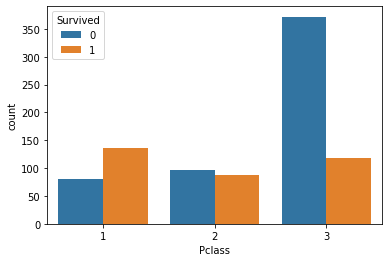

In [51]:
sns.countplot('Pclass', data=titanic, hue='Survived')

In [52]:
# Majority of passenger in class 3 didn't survive

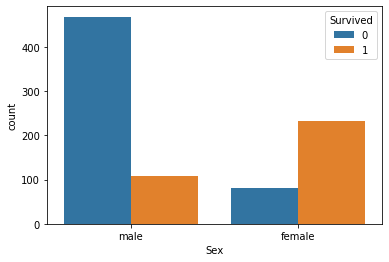

In [53]:
sns.countplot('Sex', data=titanic, hue='Survived')

In [60]:
titanic['Sex'].value_counts()/titanic['Sex'].value_counts().sum()*100

male      64.758698
female    35.241302
Name: Sex, dtype: float64

In [85]:
#Majority of people on board are males and larger percentage of the females survived

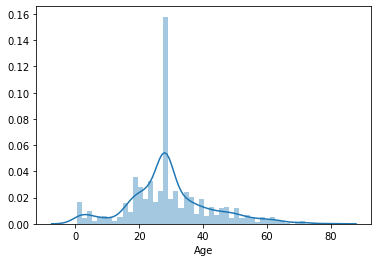

In [74]:
sns.distplot(titanic['Age'], bins=50)

In [75]:
#Majority are youth of 18 to 40 yeatrs of Age

In [76]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

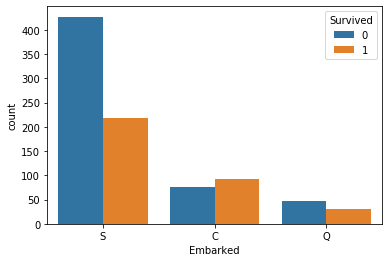

In [78]:
sns.countplot('Embarked', data=titanic, hue='Survived')

In [79]:
titanic['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

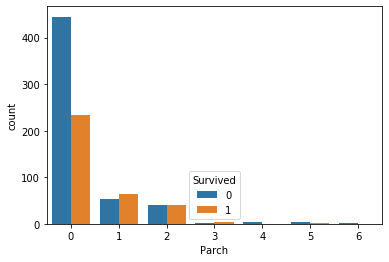

In [86]:
sns.countplot('Parch', data=titanic, hue='Survived')

In [98]:
titanic['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [134]:
titanic['Age'].value_counts()/titanic['Age'].count()*100

28.00    22.671156
24.00     3.367003
22.00     3.030303
18.00     2.918070
19.00     2.805836
           ...    
55.50     0.112233
70.50     0.112233
66.00     0.112233
23.50     0.112233
0.42      0.112233
Name: Age, Length: 88, dtype: float64

In [136]:
titanic['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

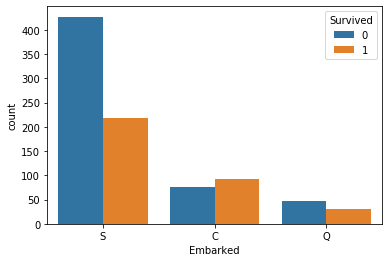

In [135]:
sns.countplot('Embarked', data=titanic, hue='Survived')

In [137]:
# Most people embarked from Southampton and majority of them did not survive
# Cherbourg passenger survived more

In [142]:
titanic['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

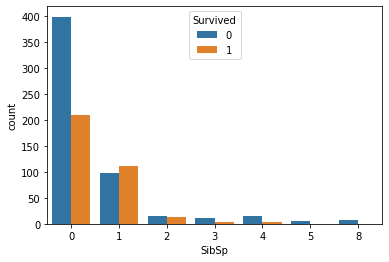

In [143]:
sns.countplot('SibSp', data=titanic, hue='Survived')

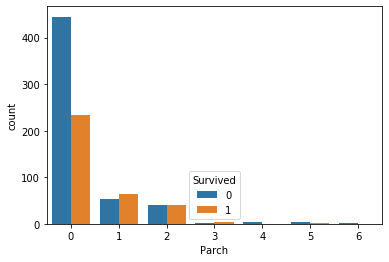

In [140]:
sns.countplot('Parch', data=titanic, hue='Survived')

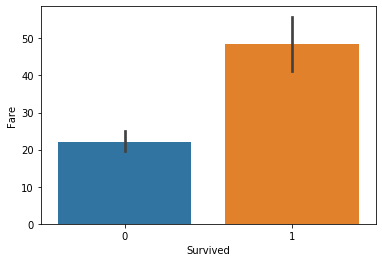

In [156]:
sns.barplot('Survived', 'Fare', data=titanic)

In [157]:
# Passenger that paid more survived more

## **Conclusion**

#### With the above observation, I arrived at the following conclusions